In [6]:
import numpy as np
import pandas as pd

In [7]:
glass=pd.read_csv("./glass.csv")
print(glass)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


In [12]:
#统计各个类别的样本数量
y=glass.loc[:,'Type']
print(pd.value_counts(y))

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


In [11]:
#样本描述
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [47]:
from sklearn.model_selection import train_test_split

# 先将数据特征值和标签值分类
X=glass[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']].values
Y=glass[['Type']].values

#将数据集 按8:2划分为训练集和测试集
x_train, x_test,  y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [106]:
# SVM
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score
clf=svm.SVC(kernel = 'linear',decision_function_shape='ovo') 
clf=clf.fit(x_train,y_train) 

acc_train=clf.score(x_train,y_train)
acc_test=clf.score(x_test,y_test)
recall=recall_score(y_test,clf.predict(x_test),average='macro')
y_predict=clf.predict(x_test)

print("Acc_train:%.4f\n Acc_test:%.4f\n Recall:%.4f\n"%(acc_train,acc_test,recall ))


Acc_train:0.6842
 Acc_test:0.6744
 Recall:0.5391



d:\software_app\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
# 使用不同的内核进行训练

def SVM(klearns):
    return svm.SVC(kernel =klearns,decision_function_shape='ovo') 

klearns=['linear','rbf','poly','sigmoid']

for type in klearns:
    clf=SVM(type)
    clf.fit(x_train,y_train)
    acc_train=clf.score(x_train,y_train)
    acc_test=clf.score(x_test,y_test)
    recall=recall_score(y_test,clf.predict(x_test),average='macro')
    print("klearn=%s\t Acc_train:%.4f\t Acc_test:%.4f\t Recall:%.4f\t"%(type,acc_train,acc_test,recall))

klearn=linear	 Acc_train:0.6842	 Acc_test:0.6744	 Recall:0.5391	
klearn=rbf	 Acc_train:0.3509	 Acc_test:0.3721	 Recall:0.1667	
klearn=poly	 Acc_train:0.3509	 Acc_test:0.3721	 Recall:0.1667	
klearn=sigmoid	 Acc_train:0.3509	 Acc_test:0.3721	 Recall:0.1667	


d:\software_app\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\software_app\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\software_app\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\software_app\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d arr

In [100]:
# 加入惩罚值
def SVM(args):
    return svm.SVC(kernel =args['klearn'],decision_function_shape='ovo',C=args['c']) 

klearns=[{'klearn':'linear', 'c':19},{'klearn':'rbf','c':17},{'klearn':'poly','c':10},{'klearn':'sigmoid','c':20}]

for i in range(len(klearns)):
    clf=SVM(klearns[i])
    clf.fit(x_train,y_train)
    acc_train=clf.score(x_train,y_train)
    acc_test=clf.score(x_test,y_test)
    recall=recall_score(y_test,clf.predict(x_test),average='macro')
    print("klearn=%s\t C=%d\t Acc_train:%.4f\t Acc_test:%.4f\t Recall:%.4f\t"%(klearns[i]['klearn'],klearns[i]['c'],acc_train,acc_test,recall))

klearn=linear	 C=19	 Acc_train:0.7544	 Acc_test:0.7209	 Recall:0.7162	
klearn=rbf	 C=17	 Acc_train:0.5029	 Acc_test:0.4419	 Recall:0.3368	
klearn=poly	 C=10	 Acc_train:0.4971	 Acc_test:0.4186	 Recall:0.3264	
klearn=sigmoid	 C=20	 Acc_train:0.3509	 Acc_test:0.3721	 Recall:0.1667	


d:\software_app\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\software_app\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\software_app\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\software_app\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d arr

d:\software_app\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\software_app\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[ 9  2  0  0  0  0]
 [ 3 12  0  0  0  1]
 [ 4  2  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  0  0  0  6]]


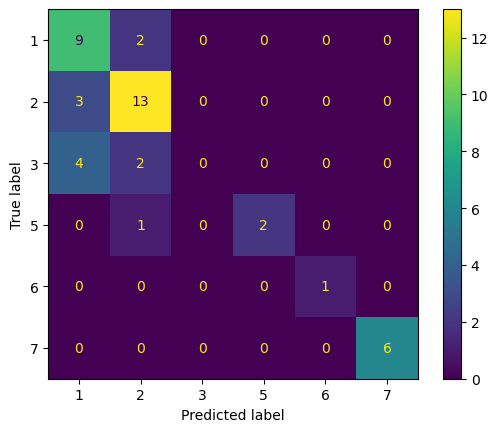

In [105]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

clf=svm.SVC(kernel = 'linear',C=19,decision_function_shape='ovo') 
clf=clf.fit(x_train,y_train)
cfm=confusion_matrix(y_test,y_predict)
plot_confusion_matrix(clf,x_test,y_test)
print(cfm)